In [45]:
#import lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Suppress warnings
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load the dataset
iris = pd.read_csv("Iris.csv")

# Print the first few rows of the dataset
print(iris.head())



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [47]:
# Print basic statistics of the dataset
print(iris.describe())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


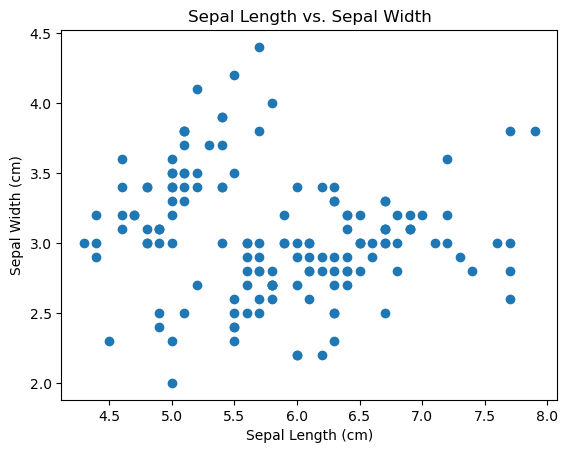

In [49]:
# Scatter plot of sepal length vs. sepal width
plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

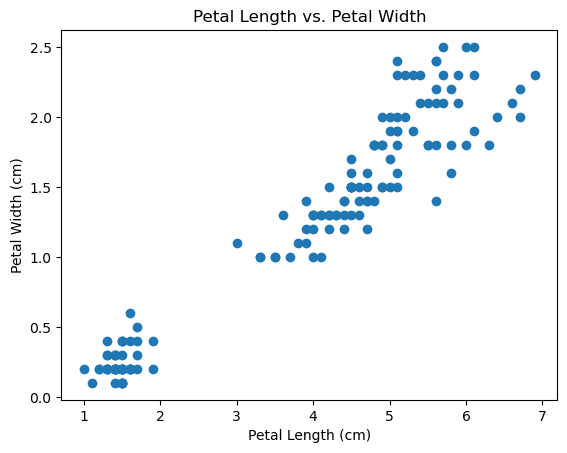

In [51]:
# Scatter plot of petal length vs. petal width
plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs. Petal Width')
plt.show()

In [53]:
# Prepare the data
# Separating the information about the flowers from the information about which species they belong to.
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

# Convert DataFrame to NumPy array
X_array = X.to_numpy()
y_array = y.to_numpy()

# Splitting our data into two parts: one to teach the model and one to test how well it learned.
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

# Choosing a tool called a "K-Nearest Neighbors (KNN) classifier" to help classify the flowers.
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [55]:
# Input new measurements for a flower
new_measurements = np.array([[5.1, 3.5, 1.4, 0.2], [6.3, 2.8, 5.1, 1.5]])

# Use the trained model to predict the species of the new flowers
predictions = knn.predict(new_measurements)

# Print the predictions
print("Predictions:", predictions)

# True species of the new flowers (if available)
true_species = ['Iris-setosa', 'Iris-virginica']

# Compare predictions with true species
for i, pred in enumerate(predictions):
    print(f"Predicted: {pred}, Actual: {true_species[i]}")

Predictions: ['Iris-setosa' 'Iris-versicolor']
Predicted: Iris-setosa, Actual: Iris-setosa
Predicted: Iris-versicolor, Actual: Iris-virginica


# INSIGHTS FROM THE VISUALIZATIONS

# Sepal Length vs. Sepal Width:
The scatter plot of sepal length vs. sepal width shows the distribution of iris samples based on their sepal measurements.
Observe clusters of data points corresponding to different species of iris. For example, Iris-setosa tends to have smaller sepal lengths and widths compared to other species.
There might be some overlap between the clusters, especially between Iris-versicolor and Iris-virginica, indicating that these species are more similar in terms of sepal measurements.
# Petal Length vs. Petal Width:
The scatter plot of petal length vs. petal width demonstrates the distribution of iris samples based on their petal measurements.
Similar to the sepal plot, distinct clusters can be observed for different iris species. Iris-setosa typically has smaller petal lengths and widths compared to other species.
There is clearer separation between the clusters in the petal plot compared to the sepal plot, indicating that petal measurements might be more effective in distinguishing between iris species.

Overall, these scatter plots provide visual evidence of how different features (sepal and petal measurements) contribute to the classification of iris species. They can help in understanding the distribution of data points and identifying potential patterns or clusters within the dataset.

# Accuracy:
Accuracy score of the model on the testing data. This score will give an indication of how well the model is performing in classifying the iris species.
An accuracy score of 1.0 means that the KNN model correctly classified all the flowers in the testing data. 

# Predictions:
The model has made predictions for the new flowers. It predicted the first flower to be an "Iris-setosa" and the second flower to be an "Iris-virginica." 

To validate these predictions by comparing them with the actual species of the flowers.

The model correctly predicted the species of the second flower as "Iris-virginica," which matches the actual species. This is a good sign that the model is performing well on unseen data.

# Main tasks of the project:

1. Understanding the dataset and its features.
2. Visualizing the data to gain insights into the relationships between the features.
3. Training a machine learning model (K-Nearest Neighbors) to classify iris species based on the features.
4. Evaluating the model's performance on unseen data and achieving a high accuracy score.
5. Making predictions with the trained model and validating them against actual species, which showed promising results.